In [30]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("MF_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [31]:
data

['t_n61          2.9857 ( 2.3534,  3.6453) ( 2.3403,  3.6306)  1.2903 (Jnode 118)\n',
 't_n62          1.4658 ( 1.0392,  1.9367) ( 1.0280,  1.9221)  0.8941 (Jnode 117)\n',
 't_n63          1.4216 ( 1.0075,  1.8803) ( 0.9919,  1.8621)  0.8703 (Jnode 116)\n',
 't_n64          1.3837 ( 0.9790,  1.8327) ( 0.9668,  1.8158)  0.8490 (Jnode 115)\n',
 't_n65          1.0548 ( 0.7141,  1.4222) ( 0.7064,  1.4104)  0.7040 (Jnode 114)\n',
 't_n66          0.5529 ( 0.2799,  0.7874) ( 0.2882,  0.7951)  0.5069 (Jnode 113)\n',
 't_n67          0.4679 ( 0.2313,  0.6721) ( 0.2239,  0.6636)  0.4397 (Jnode 112)\n',
 't_n68          0.3053 ( 0.1474,  0.4531) ( 0.1424,  0.4473)  0.3049 (Jnode 111)\n',
 't_n69          0.0321 ( 0.0121,  0.0649) ( 0.0091,  0.0598)  0.0507 (Jnode 110)\n',
 't_n70          0.3814 ( 0.1852,  0.5561) ( 0.1765,  0.5467)  0.3703 (Jnode 109)\n',
 't_n71          0.2842 ( 0.1315,  0.4469) ( 0.1254,  0.4378)  0.3124 (Jnode 108)\n',
 't_n72          0.0781 ( 0.0357,  0.1303) ( 0.0331,  

In [32]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [33]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [34]:
node_name

['t_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119']

In [35]:
posterior_mean_iqtree

[2.9857,
 1.4658,
 1.4216,
 1.3837,
 1.0548,
 0.5529,
 0.4679,
 0.3053,
 0.0321,
 0.3814,
 0.2842,
 0.0781,
 0.4732,
 0.3219,
 0.3758,
 0.1068,
 0.0393,
 0.0101,
 1.2922,
 1.0334,
 0.7394,
 0.5627,
 0.285,
 0.4632,
 0.6074,
 0.5681,
 0.3713,
 0.2096,
 0.151,
 0.0622,
 0.3141,
 0.2358,
 0.357,
 0.5055,
 0.3994,
 0.3048,
 0.1917,
 0.0706,
 0.052,
 0.0385,
 0.0239,
 0.1278,
 0.0428,
 0.2812,
 0.1807,
 0.1123,
 0.0345,
 0.3037,
 0.1791,
 1.2064,
 1.1287,
 0.4508,
 0.1253,
 0.0986,
 0.0345,
 0.2238,
 0.1704,
 2.0417,
 0.992]

In [36]:
lower_ci_iqtree

[]

In [37]:
upper_ci_iqtree

[]

In [38]:
file_LG = open("GTR_G4_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [40]:
posterior_mean_baseml

[2.9713,
 1.4751,
 1.4265,
 1.3872,
 1.0655,
 0.567,
 0.4805,
 0.3159,
 0.0338,
 0.3915,
 0.2916,
 0.0792,
 0.4886,
 0.3357,
 0.3922,
 0.1148,
 0.0406,
 0.0105,
 1.2939,
 1.0353,
 0.7442,
 0.5686,
 0.2894,
 0.4681,
 0.6095,
 0.5701,
 0.3748,
 0.2109,
 0.1556,
 0.064,
 0.316,
 0.2366,
 0.3601,
 0.5167,
 0.4085,
 0.3148,
 0.1977,
 0.0722,
 0.0533,
 0.0395,
 0.0247,
 0.1317,
 0.0441,
 0.2908,
 0.1871,
 0.1157,
 0.0356,
 0.3118,
 0.1841,
 1.2155,
 1.1347,
 0.4581,
 0.1237,
 0.0974,
 0.0321,
 0.2352,
 0.1792,
 2.0273,
 0.9771]

In [41]:
posterior_mean_iqtree

[2.9857,
 1.4658,
 1.4216,
 1.3837,
 1.0548,
 0.5529,
 0.4679,
 0.3053,
 0.0321,
 0.3814,
 0.2842,
 0.0781,
 0.4732,
 0.3219,
 0.3758,
 0.1068,
 0.0393,
 0.0101,
 1.2922,
 1.0334,
 0.7394,
 0.5627,
 0.285,
 0.4632,
 0.6074,
 0.5681,
 0.3713,
 0.2096,
 0.151,
 0.0622,
 0.3141,
 0.2358,
 0.357,
 0.5055,
 0.3994,
 0.3048,
 0.1917,
 0.0706,
 0.052,
 0.0385,
 0.0239,
 0.1278,
 0.0428,
 0.2812,
 0.1807,
 0.1123,
 0.0345,
 0.3037,
 0.1791,
 1.2064,
 1.1287,
 0.4508,
 0.1253,
 0.0986,
 0.0345,
 0.2238,
 0.1704,
 2.0417,
 0.992]

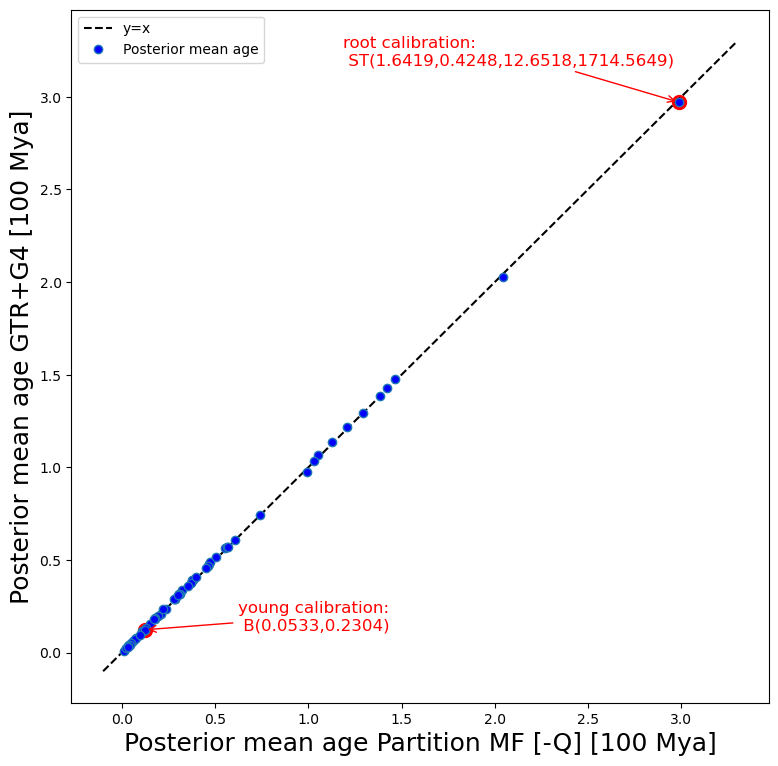

In [42]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,3.3], 
        [-0.1, 3.3], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[-7], posterior_mean_baseml[-7], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n ST(1.6419,0.4248,12.6518,1714.5649)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0]-1.8,  posterior_mean_baseml[0]+0.2 ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('young calibration:\n B(0.0533,0.2304)', 
        xy=(posterior_mean_iqtree[-7], posterior_mean_baseml[-7]), 
        xytext=(posterior_mean_iqtree[-7]+0.5 ,  posterior_mean_baseml[-7] ),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
# Labels and title
ax.set_ylabel('Posterior mean age GTR+G4 [100 Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./afrotheria_posterior_mean_age_comparison_partition_MF_p_young_scatter.png')

In [43]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')